In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import time

In [41]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Bidirectional
import keras.callbacks
from tensorflow.keras.callbacks import TensorBoard

# Using past 48 hours to predict next 48 hours


In [4]:
df0 = pd.read_json("https://data.melbourne.vic.gov.au/resource/b2ak-trbp.json?$offset=2546125")

In [5]:
df0.head(50)

date_time     day  hourly_counts       id  mdate     month  \
0  2019-02-01 00:00:00  Friday            146  2546571      1  February   
1  2019-02-01 00:00:00  Friday             25  2546572      1  February   
2  2019-02-01 00:00:00  Friday             17  2546573      1  February   
3  2019-02-01 00:00:00  Friday             62  2546574      1  February   
4  2019-02-01 00:00:00  Friday             65  2546575      1  February   
5  2019-02-01 00:00:00  Friday             99  2546576      1  February   
6  2019-02-01 00:00:00  Friday             96  2546577      1  February   
7  2019-02-01 00:00:00  Friday             28  2546578      1  February   
8  2019-02-01 00:00:00  Friday              3  2546579      1  February   
9  2019-02-01 00:00:00  Friday             27  2546580      1  February   
10 2019-02-01 00:00:00  Friday             25  2546581      1  February   
11 2019-02-01 00:00:00  Friday             12  2546582      1  February   
12 2019-02-01 00:00:00  Friday            116  2546583      1  February   
13 2019-02-01 00:00:00  Friday            251  2546584      1  February   
14 2019-02-01 00:00:00  Friday            103  2546585      1  February   
15 2019-02-01 00:00:00  Friday            167  2546586      1  February   
16 2019-02-01 00:00:00  Friday            110  2546587      1  February   
17 2019-02-01 00:00:00  Friday             44  2546588      1  February   
18 2019-02-01 00:00:00  Friday             31  2546589      1  February   
19 2019-02-01 00:00:00  Friday            243  2546590      1  February   
20 2019-02-01 00:00:00  Friday            147  2546591      1  February   
21 2019-02-01 00:00:00  Friday            157  2546592      1  February   
22 2019-02-01 00:00:00  Friday             28  2546593      1  February   
23 2019-02-01 00:00:00  Friday             56  2546594      1  February   
24 2019-02-01 00:00:00  Friday             72  2546595      1  February   
25 2019-02-01 00:00:00  Friday            201  2546596      1  February   
26 2019-02-01 00:00:00  Friday             12  2546597      1  February   
27 2019-02-01 00:00:00  Friday             10  2546598      1  February   
28 2019-02-01 00:00:00  Friday             12  2546599      1  February   
29 2019-02-01 00:00:00  Friday              7  2546600      1  February   
30 2019-02-01 00:00:00  Friday             23  2546601      1  February   
31 2019-02-01 00:00:00  Friday             83  2546602      1  February   
32 2019-02-01 00:00:00  Friday             59  2546603      1  February   
33 2019-02-01 00:00:00  Friday             75  2546604      1  February   
34 2019-02-01 00:00:00  Friday              5  2546605      1  February   
35 2019-02-01 00:00:00  Friday              5  2546606      1  February   
36 2019-02-01 00:00:00  Friday            187  2546607      1  February   
37 2019-02-01 00:00:00  Friday              3  2546608      1  February   
38 2019-02-01 00:00:00  Friday            169  2546609      1  February   
39 2019-02-01 00:00:00  Friday             36  2546610      1  February   
40 2019-02-01 00:00:00  Friday             65  2546611      1  February   
41 2019-02-01 00:00:00  Friday             19  2546612      1  February   
42 2019-02-01 00:00:00  Friday             24  2546613      1  February   
43 2019-02-01 00:00:00  Friday             67  2546614      1  February   
44 2019-02-01 00:00:00  Friday             16  2546615      1  February   
45 2019-02-01 00:00:00  Friday             49  2546616      1  February   
46 2019-02-01 00:00:00  Friday             50  2546617      1  February   
47 2019-02-01 00:00:00  Friday            114  2546618      1  February   
48 2019-02-01 01:00:00  Friday            102  2546619      1  February   
49 2019-02-01 01:00:00  Friday             17  2546620      1  February   

    sensor_id                             sensor_name  time  year  
0           4                        Town Hall (West)     0  2019  
1          17                   Collins Place (Sout

In [17]:
data = pd.read_csv("../data/pedestrian.csv")

In [18]:
data = data.iloc[2079491:,]
data.shape

(536156, 10)

In [19]:
data.head()

ID               Date_Time  Year    Month  Mdate     Day  Time  \
2079491  2079941  01/01/2018 12:00:00 AM  2018  January      1  Monday     0   
2079492  2079942  01/01/2018 12:00:00 AM  2018  January      1  Monday     0   
2079493  2079943  01/01/2018 12:00:00 AM  2018  January      1  Monday     0   
2079494  2079944  01/01/2018 12:00:00 AM  2018  January      1  Monday     0   
2079495  2079945  01/01/2018 12:00:00 AM  2018  January      1  Monday     0   

         Sensor_ID                        Sensor_Name  Hourly_Counts  
2079491          4                   Town Hall (West)         3052.0  
2079492          5                     Princes Bridge         1757.0  
2079493          6  Flinders Street Station Underpass         3443.0  
2079494          7                     Birrarung Marr         1828.0  
2079495          8                        Webb Bridge          605.0

In [26]:
data[data['Sensor_ID'] == 20]

ID               Date_Time  Year    Month  Mdate       Day  \
2079504  2079954  01/01/2018 12:00:00 AM  2018  January      1    Monday   
2079550  2080000  01/01/2018 01:00:00 AM  2018  January      1    Monday   
2079596  2080046  01/01/2018 02:00:00 AM  2018  January      1    Monday   
2079642  2080092  01/01/2018 03:00:00 AM  2018  January      1    Monday   
2079688  2080138  01/01/2018 04:00:00 AM  2018  January      1    Monday   
2079734  2080184  01/01/2018 05:00:00 AM  2018  January      1    Monday   
2079780  2080230  01/01/2018 06:00:00 AM  2018  January      1    Monday   
2079826  2080276  01/01/2018 07:00:00 AM  2018  January      1    Monday   
2079872  2080322  01/01/2018 08:00:00 AM  2018  January      1    Monday   
2079918  2080368  01/01/2018 09:00:00 AM  2018  January      1    Monday   
2079964  2080414  01/01/2018 10:00:00 AM  2018  January      1    Monday   
2080010  2080460  01/01/2018 11:00:00 AM  2018  January      1    Monday   
2080056  2080506  01/01/2018 12:00:00 PM  2018  January      1    Monday   
2080102  2080552  01/01/2018 01:00:00 PM  2018  January      1    Monday   
2080148  2080598  01/01/2018 02:00:00 PM  2018  January      1    Monday   
2080194  2080644  01/01/2018 03:00:00 PM  2018  January      1    Monday   
2080240  2080690  01/01/2018 04:00:00 PM  2018  January      1    Monday   
2080286  2080736  01/01/2018 05:00:00 PM  2018  January      1    Monday   
2080332  2080782  01/01/2018 06:00:00 PM  2018  January      1    Monday   
2080378  2080828  01/01/2018 07:00:00 PM  2018  January      1    Monday   
2080424  2080874  01/01/2018 08:00:00 PM  2018  January      1    Monday   
2080470  2080920  01/01/2018 09:00:00 PM  2018  January      1    Monday   
2080517  2080966  01/01/2018 10:00:00 PM  2018  January      1    Monday   
2080563  2081012  01/01/2018 11:00:00 PM  2018  January      1    Monday   
2080608  2081058  01/02/2018 12:00:00 AM  2018  January      2   Tuesday   
2080654  2081104  01/02/2018 01:00:00 AM  2018  January      2   Tuesday   
2080700  2081150  01/02/2018 02:00:00 AM  2018  January      2   Tuesday   
2080746  2081196  01/02/2018 03:00:00 AM  2018  January      2   Tuesday   
2080792  2081242  01/02/2018 04:00:00 AM  2018  January      2   Tuesday   
2080838  2081288  01/02/2018 05:00:00 AM  2018  January      2   Tuesday   
...          ...                     ...   ...      ...    ...       ...   
2614197  2614647  03/30/2019 06:00:00 PM  2019    March     30  Saturday   
2614246  2614696  03/30/2019 07:00:00 PM  2019    March     30  Saturday   
2614295  2614745  03/30/2019 08:00:00 PM  2019    March     30  Saturday   
2614344  2614794  03/30/2019 09:00:00 PM  2019    March     30  Saturday   
2614393  2614843  03/30/2019 10:00:00 PM  2019    March     30  Saturday   
2614442  2614892  03/30/2019 11:00:00 PM  2019    March     30  Saturday   
2614491  2614941  03/31/2019 12:00:00 AM  2019    March     31    Sunday   
2614540  2614990  03/31/2019 01:00:00 AM  2019    March     31    Sunday   
2614589  2615039  03/31/2019 02:00:00 AM  2019    March     31    Sunday   
2614638  2615088  03/31/2019 03:00:00 AM  2019    March     31    Sunday   
2614687  2615137  03/31/2019 04:00:00 AM  2019    March     31    Sunday   
2614736  2615186  03/31/2019 05:00:00 AM  2019    March     31    Sunday   
2614785  2615235  03/31/2019 06:00:00 AM  2019    March     31    Sunday   
2614834  2615284  03/31/2019 07:00:00 AM  2019    March     31    Sunday   
2614883  2615333  03/31/2019 08:00:00 AM  2019    March     31    Sunday   
2614932  2615382  03/31/2019 09:00:00 AM  2019    March     31    Sunday   
2614981  2615431  03/31/2019 10:00:00 AM  2019    March     31    Sunday   
2615030  2615480  03/31/2019 11:00:00 AM  2019    March     31    Sunday   
2615079  2615529  03/31/2019 12:00:00 PM  2019    March     31    Sunday   
2615128  2615578  03/31/2019 01:00:00 PM  2019    March     31    Sunday   
2615177  2615627  03/31/2019 02:00:00 PM  2019    March     31

In [21]:
df = data.iloc[:,[1,8,9]] # Select date,sensor,counts
df.head(50)

Date_Time                             Sensor_Name  \
2079491  01/01/2018 12:00:00 AM                        Town Hall (West)   
2079492  01/01/2018 12:00:00 AM                          Princes Bridge   
2079493  01/01/2018 12:00:00 AM       Flinders Street Station Underpass   
2079494  01/01/2018 12:00:00 AM                          Birrarung Marr   
2079495  01/01/2018 12:00:00 AM                             Webb Bridge   
2079496  01/01/2018 12:00:00 AM                  Southern Cross Station   
2079497  01/01/2018 12:00:00 AM                          Victoria Point   
2079498  01/01/2018 12:00:00 AM                         Waterfront City   
2079499  01/01/2018 12:00:00 AM                                New Quay   
2079500  01/01/2018 12:00:00 AM                        Sandridge Bridge   
2079501  01/01/2018 12:00:00 AM                           State Library   
2079502  01/01/2018 12:00:00 AM                   Collins Place (North)   
2079503  01/01/2018 12:00:00 AM           Chinatown-Swanston St (North)   
2079504  01/01/2018 12:00:00 AM          Chinatown-Lt Bourke St (South)   
2079505  01/01/2018 12:00:00 AM             Bourke St-Russell St (West)   
2079506  01/01/2018 12:00:00 AM         Flinders St-Elizabeth St (East)   
2079507  01/01/2018 12:00:00 AM           Spencer St-Collins St (South)   
2079508  01/01/2018 12:00:00 AM           Spencer St-Collins St (North)   
2079509  01/01/2018 12:00:00 AM  Melbourne Convention Exhibition Centre   
2079510  01/01/2018 12:00:00 AM           QV Market-Elizabeth St (West)   
2079511  01/01/2018 12:00:00 AM                       QV Market-Peel St   
2079512  01/01/2018 12:00:00 AM                         The Arts Centre   
2079513  01/01/2018 12:00:00 AM           St Kilda Rd-Alexandra Gardens   
2079514  01/01/2018 12:00:00 AM                         Lygon St (West)   
2079515  01/01/2018 12:00:00 AM            Flinders St-Spring St (West)   
2079516  01/01/2018 12:00:00 AM                    Flinders St-Spark La   
2079517  01/01/2018 12:00:00 AM                               Southbank   
2079518  01/01/2018 12:00:00 AM                         Queen St (West)   
2079519  01/01/2018 12:00:00 AM                         Lygon St (East)   
2079520  01/01/2018 12:00:00 AM            Lonsdale St-Spring St (West)   
2079521  01/01/2018 12:00:00 AM           Grattan St-Swanston St (West)   
2079522  01/01/2018 12:00:00 AM            Monash Rd-Swanston St (West)   
2079523  01/01/2018 12:00:00 AM            Tin Alley-Swanston St (West)   
2079524  01/01/2018 12:00:00 AM    Little Collins St-Swanston St (East)   
2079525  01/01/2018 12:00:00 AM          Flinders La-Swanston St (West)   
2079526  01/01/2018 12:00:00 AM                       Pelham St (South)   
2079527  01/01/2018 12:00:00 AM   Melbourne Central-Elizabeth St (East)   
2079528  01/01/2018 12:00:00 AM                     QVM-Queen St (East)   
2079529  01/01/2018 12:00:00 AM                   QVM-Therry St (South)   
2079530  01/01/2018 12:00:00 AM              Faraday St-Lygon St (West)   
2079531  01/01/2018 12:00:00 AM                 QVM-Franklin St (North)   
2079532  01/01/2018 12:00:00 AM        Elizabeth St-Lonsdale St (South)   
2079533  01/01/2018 12:00:00 AM                      Collins St (North)   
2079534  01/01/2018 01:00:00 AM              Bourke Street Mall (North)   
2079535  01/01/2018 01:00:00 AM              Bourke Street Mall (South)   
2079536  01/01/2018 01:00:00 AM                       Melbourne Central   
2079537  01/01/2018 01:00:00 AM                        Town Hall (West)   
2079538  01/01/2018 01:00:00 AM                          Princes Bridge   
2079539  01/01/2018 01:00:00 AM       Flinders Street Station Underpass   
2079540  01/01/2018 01:00:00 AM                          Birrarung Marr   

         Hourly_Counts  
2079491         3052.0  
2079492         1757.0  
2079493         3443.0  
2079494         1828.0  
2079495          605.0  
2079496         1411.0  
2079497          963.

In [10]:
data_train = df.iloc[:436156,:]
data_test = df.iloc[436156:,:]

In [11]:
# Change into datetime
data_train["Date_Time"] = pd.to_datetime(data_train["Date_Time"])
data_test["Date_Time"] = pd.to_datetime(data_test["Date_Time"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
## Modelling for Town Hall (West)
df_TownHallWest_train = data_train[data_train['Sensor_Name']=='Chinatown-Lt Bourke St (South)']
df_TownHallWest_test = data_test[data_test['Sensor_Name']=='Chinatown-Lt Bourke St (South)']

In [28]:
df_TownHallWest_train = df_TownHallWest_train.set_index(['Date_Time'])
df_TownHallWest_train = df_TownHallWest_train.drop(columns=['Sensor_Name'])

In [29]:
def scale_data(dataset):
    scaler = MinMaxScaler(feature_range=(0, 1))
    training_scaled = scaler.fit_transform(dataset)
    return training_scaled

def build_X(training_scaled):
    X_train = []
    lookback = 168

    for i in range(lookback, len(training_scaled)):
        X_train.append(training_scaled[i-lookback:i,0])   
        
    X_train = np.array(X_train)
    return X_train

def build_Y(training_scaled):
    Y_train = []
    lookback = 168

    for i in range(lookback, len(training_scaled)):
        Y_train.append(training_scaled[i,0])
        
    Y_train = np.array(Y_train)
    return Y_train

In [30]:
X_train = build_X(scale_data(df_TownHallWest_train))
Y_train = build_Y(scale_data(df_TownHallWest_train))

In [31]:
X_train

array([[0.20851476, 0.22835027, 0.19400097, ..., 0.27721335, 0.15432995,
        0.07837446],
       [0.22835027, 0.19400097, 0.095791  , ..., 0.15432995, 0.07837446,
        0.03144654],
       [0.19400097, 0.095791  , 0.06531205, ..., 0.07837446, 0.03144654,
        0.01935172],
       ...,
       [0.13159168, 0.10595065, 0.05757136, ..., 0.42138365, 0.3763909 ,
        0.3560716 ],
       [0.10595065, 0.05757136, 0.03821964, ..., 0.3763909 , 0.3560716 ,
        0.16932753],
       [0.05757136, 0.03821964, 0.0135462 , ..., 0.3560716 , 0.16932753,
        0.08756652]])

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
# Keras settings
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [40]:
lookback = 168
epochs = 20
batch_size = 32

model = Sequential()
model.add(Bidirectional(LSTM(batch_size, input_shape=(lookback,1), return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(batch_size, input_shape=(lookback,1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(batch_size, input_shape=(lookback,1)))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[earlystop], validation_split=0.2)

Train on 6357 samples, validate on 1590 samples
Epoch 1/20
 352/6357 [>.............................] - ETA: 2:48 - loss: 0.0360

KeyboardInterrupt: 

In [39]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

## Save Model

In [43]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_v1.h5")
print("Saved model to disk")

Saved model to disk


In [33]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'loss'])


## Testing

In [34]:
df_TownHallWest_test.head(1)

Date_Time  Hourly_Counts
0 2019-01-06 04:00:00          118.0

In [35]:
df_TownHallWest_test = df_TownHallWest_test.set_index(['Date_Time'])
df_TownHallWest_test = df_TownHallWest_test.drop(columns=['Sensor_Name'])

KeyError: "['Sensor_Name'] not found in axis"

In [37]:
df_save = df_TownHallWest_test
#df_TownHallWest_test = df_save
df_TownHallWest_test.head(1)

Hourly_Counts
Date_Time                         
2019-01-06 04:00:00          118.0

In [38]:
# Just use "r" records 
r = 168

df_x = df_TownHallWest_test.iloc[:r*2]
#df_x = df_x.set_index(['Date_Time'])
#df_x = df_x.drop(columns=['index'])
#df_x = pd.DataFrame(df_x)

In [39]:
# make predictions
sc = MinMaxScaler(feature_range = (0,1))
X_test = sc.fit_transform(df_x)
X_test = build_X(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
test_predict = model.predict(X_test)
test_predict = sc.inverse_transform(test_predict)

In [40]:
#data_test.reset_index(level=0, inplace=True)
test_predict = pd.DataFrame(test_predict)
test_predict = test_predict.clip(lower=0)
#test_predict.index = test_predict.index + 20

In [41]:
df_test = df_TownHallWest_test
df_test.reset_index(level=0, inplace=True)
df_test = df_test.drop(columns=('Date_Time'))

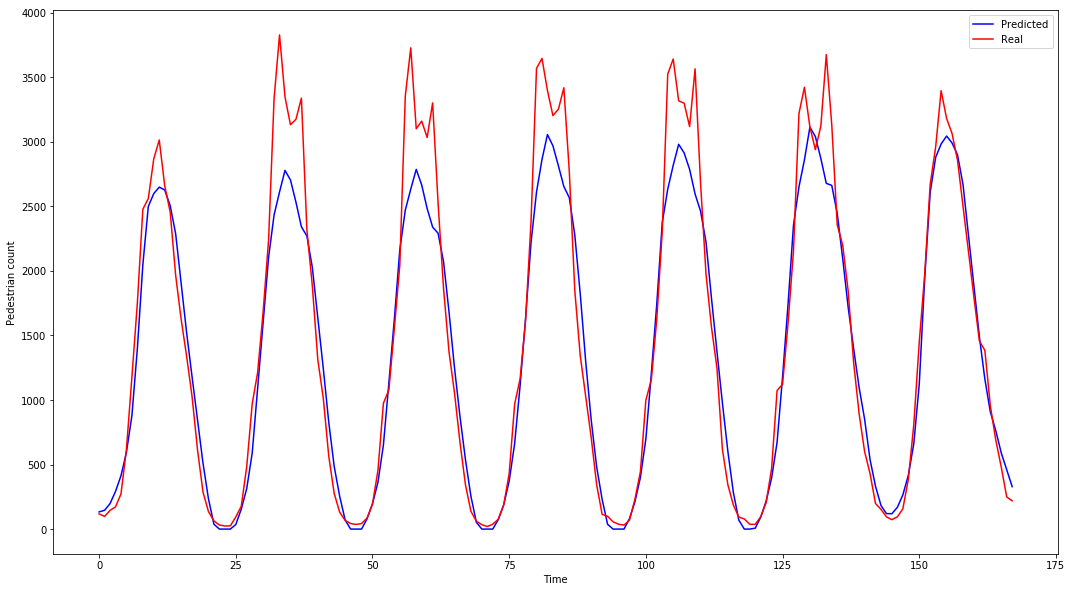

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


plt.figure(figsize=(18,10))
plt.plot(test_predict.iloc[0:168], color = 'blue', label='Predicted')
plt.plot(df_test.iloc[0:168], color = 'red', label='Real')
plt.xlabel('Time')
plt.ylabel('Pedestrian count')
plt.legend()
plt.show()